<a href="https://colab.research.google.com/github/dhikaainul/PCVK_Ganjil_2022/blob/main/Jobsheet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

 Mengubah nilai kecerahan 
----------------------------
Masukkan nilai kecerahan: 50


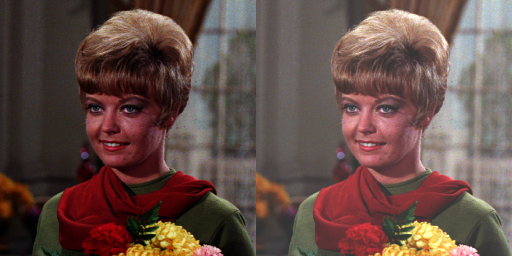

In [ ]:

print(' Mengubah nilai kecerahan ')
print('----------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')

brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)



 Mengubah kontras dan tingkat kecerahan citra
----------------------------
Masukkan nilai kecerahan [-255 - 255]: 50
Masukkan nilai contrast [1.0 - 3.0]: 1,5
Error, not a number


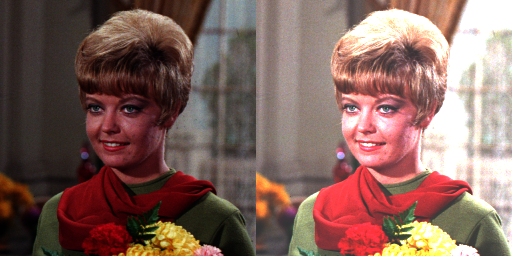

In [ ]:

print(' Mengubah kontras dan tingkat kecerahan citra')
print('----------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contrast = int(input('Masukkan nilai contrast [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)


for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

 Mengubah tingkat kecerahan citra dengan transformasi log
----------------------------
Masukkan nilai kecerahan : 40


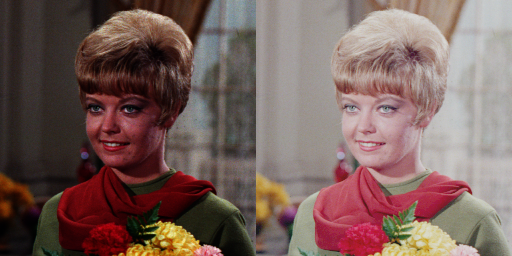

In [ ]:
print(' Mengubah tingkat kecerahan citra dengan transformasi log')
print('----------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan : '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
# contrast_image = np.zeros(original.shape, original.dtype)
brightness_image = np.zeros(original.shape, original.dtype)


for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness * np.log(1 + original[y,x,c]), 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

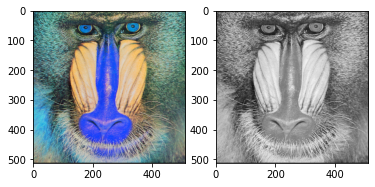

In [31]:
# Averaging
color_img = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
R, G, B = color_img[:,:,0], color_img[:,:,1], color_img[:,:,2]
gray_img = R/3 + G/3 +B/3
f, axarr = plt.subplots(1,2)
axarr[0].imshow(color_img)
axarr[1].imshow(gray_img, cmap='gray')

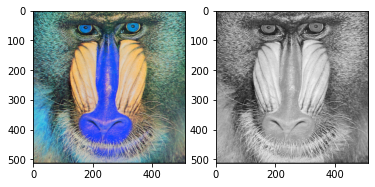

In [30]:
# Lightness
color_img = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
R, G, B = color_img[:,:,0], color_img[:,:,1], color_img[:,:,2]
max_channels = np.maximum(np.maximum(R,G), B)
min_channels = np.minimum(np.minimum(R,G), B)

gray_img = max_channels/2 + min_channels/2

f, axarr = plt.subplots(1,2)
axarr[0].imshow(color_img)
axarr[1].imshow(gray_img, cmap='gray')

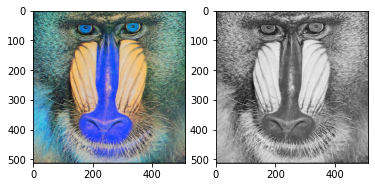

In [46]:
# Luminance
color_img = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
R, G, B = color_img[:,:,0], color_img[:,:,1], color_img[:,:,2]
gray_img = (0.2126 * R) + (0.7152 * G) + (0.0722 * B)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(color_img)
axarr[1].imshow(gray_img, cmap='gray')


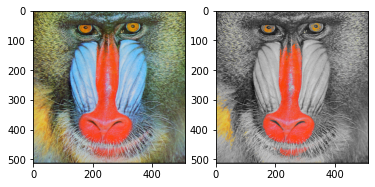

In [51]:
# NO 4
img = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
color_img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
ret, mask = cv.threshold(img[:, :,2], 200, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img)
mask3[:, :, 0] = mask
mask3[:, :, 1] = mask
mask3[:, :, 2] = mask

orange = cv.bitwise_and(color_img, mask3)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img  = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(img, 255 - mask3)
out = gray + orange

f, axarr = plt.subplots(1,2)
axarr[0].imshow(color_img)
axarr[1].imshow(out, cmap='gray')